# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 13.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 21.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 373 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp25 # use or create a database named demo
tweet_collection = db.final_project_covid #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [11]:
#track = ['election'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [9]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [10]:
count = 3000 #number of returned tweets, default and max is 100
geocode = "47.6129432,-122.4821496,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [13]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Dec 15 21:08:04 +0000 2020'
'Tue Dec 15 21:07:54 +0000 2020'
'Tue Dec 15 21:07:33 +0000 2020'
'Tue Dec 15 21:07:15 +0000 2020'
'Tue Dec 15 21:06:50 +0000 2020'
'Tue Dec 15 21:06:10 +0000 2020'
'Tue Dec 15 21:06:04 +0000 2020'
'Tue Dec 15 21:05:34 +0000 2020'
'Tue Dec 15 21:05:07 +0000 2020'
'Tue Dec 15 21:04:33 +0000 2020'
'Tue Dec 15 21:04:32 +0000 2020'
'Tue Dec 15 21:03:58 +0000 2020'
'Tue Dec 15 21:03:50 +0000 2020'
'Tue Dec 15 21:03:39 +0000 2020'
'Tue Dec 15 21:03:02 +0000 2020'
'Tue Dec 15 21:03:01 +0000 2020'
'Tue Dec 15 21:02:30 +0000 2020'
'Tue Dec 15 21:02:26 +0000 2020'
'Tue Dec 15 21:02:24 +0000 2020'
'Tue Dec 15 21:02:22 +0000 2020'
'Tue Dec 15 21:02:20 +0000 2020'
'Tue Dec 15 21:02:18 +0000 2020'
'Tue Dec 15 21:01:55 +0000 2020'
'Tue Dec 15 21:01:33 +0000 2020'
'Tue Dec 15 21:01:27 +0000 2020'
'Tue Dec 15 21:01:01 +0000 2020'
'Tue Dec 15 21:00:35 +0000 2020'
'Tue Dec 15 21:00:35 +0000 2020'
'Tue Dec 15 21:00:24 +0000 2020'
'Tue Dec 15 20:59:24 +0000 2020'
'Tue Dec 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [14]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Dec 15 20:40:36 +0000 2020'
'Tue Dec 15 20:40:31 +0000 2020'
'Tue Dec 15 20:40:09 +0000 2020'
'Tue Dec 15 20:39:25 +0000 2020'
'Tue Dec 15 20:39:01 +0000 2020'
'Tue Dec 15 20:39:00 +0000 2020'
'Tue Dec 15 20:38:44 +0000 2020'
'Tue Dec 15 20:38:38 +0000 2020'
'Tue Dec 15 20:38:25 +0000 2020'
'Tue Dec 15 20:38:07 +0000 2020'
'Tue Dec 15 20:37:47 +0000 2020'
'Tue Dec 15 20:37:42 +0000 2020'
'Tue Dec 15 20:37:38 +0000 2020'
'Tue Dec 15 20:37:19 +0000 2020'
'Tue Dec 15 20:37:11 +0000 2020'
'Tue Dec 15 20:36:31 +0000 2020'
'Tue Dec 15 20:36:01 +0000 2020'
'Tue Dec 15 20:35:57 +0000 2020'
'Tue Dec 15 20:35:34 +0000 2020'
'Tue Dec 15 20:35:22 +0000 2020'
'Tue Dec 15 20:35:05 +0000 2020'
'Tue Dec 15 20:34:41 +0000 2020'
'Tue Dec 15 20:34:33 +0000 2020'
'Tue Dec 15 20:34:30 +0000 2020'
'Tue Dec 15 20:34:23 +0000 2020'
'Tue Dec 15 20:33:48 +0000 2020'
'Tue Dec 15 20:33:43 +0000 2020'
'Tue Dec 15 20:33:42 +0000 2020'
'Tue Dec 15 20:33:27 +0000 2020'
'Tue Dec 15 20:33:00 +0000 2020'
'Tue Dec 1

'Tue Dec 15 19:03:00 +0000 2020'
'Tue Dec 15 19:02:59 +0000 2020'
'Tue Dec 15 19:02:27 +0000 2020'
'Tue Dec 15 19:01:13 +0000 2020'
'Tue Dec 15 19:00:40 +0000 2020'
'Tue Dec 15 19:00:29 +0000 2020'
'Tue Dec 15 19:00:28 +0000 2020'
'Tue Dec 15 19:00:22 +0000 2020'
'Tue Dec 15 18:59:31 +0000 2020'
'Tue Dec 15 18:59:30 +0000 2020'
'Tue Dec 15 18:59:18 +0000 2020'
'Tue Dec 15 18:58:45 +0000 2020'
'Tue Dec 15 18:58:44 +0000 2020'
'Tue Dec 15 18:58:16 +0000 2020'
'Tue Dec 15 18:57:32 +0000 2020'
'Tue Dec 15 18:56:45 +0000 2020'
'Tue Dec 15 18:56:42 +0000 2020'
'Tue Dec 15 18:56:20 +0000 2020'
'Tue Dec 15 18:55:51 +0000 2020'
'Tue Dec 15 18:55:30 +0000 2020'
'Tue Dec 15 18:55:28 +0000 2020'
'Tue Dec 15 18:55:19 +0000 2020'
'Tue Dec 15 18:55:06 +0000 2020'
'Tue Dec 15 18:54:30 +0000 2020'
'Tue Dec 15 18:54:28 +0000 2020'
'Tue Dec 15 18:54:25 +0000 2020'
'Tue Dec 15 18:53:05 +0000 2020'
'Tue Dec 15 18:52:06 +0000 2020'
'Tue Dec 15 18:51:50 +0000 2020'
'Tue Dec 15 18:51:37 +0000 2020'
'Tue Dec 1

'Tue Dec 15 16:54:01 +0000 2020'
'Tue Dec 15 16:53:53 +0000 2020'
'Tue Dec 15 16:53:04 +0000 2020'
'Tue Dec 15 16:53:02 +0000 2020'
'Tue Dec 15 16:52:05 +0000 2020'
'Tue Dec 15 16:51:09 +0000 2020'
'Tue Dec 15 16:50:51 +0000 2020'
'Tue Dec 15 16:49:57 +0000 2020'
'Tue Dec 15 16:49:30 +0000 2020'
'Tue Dec 15 16:48:47 +0000 2020'
'Tue Dec 15 16:47:59 +0000 2020'
'Tue Dec 15 16:47:14 +0000 2020'
'Tue Dec 15 16:46:23 +0000 2020'
'Tue Dec 15 16:45:40 +0000 2020'
'Tue Dec 15 16:44:02 +0000 2020'
'Tue Dec 15 16:43:20 +0000 2020'
'Tue Dec 15 16:42:32 +0000 2020'
'Tue Dec 15 16:41:47 +0000 2020'
'Tue Dec 15 16:38:37 +0000 2020'
'Tue Dec 15 16:38:18 +0000 2020'
'Tue Dec 15 16:37:50 +0000 2020'
'Tue Dec 15 16:37:44 +0000 2020'
'Tue Dec 15 16:37:12 +0000 2020'
'Tue Dec 15 16:35:38 +0000 2020'
'Tue Dec 15 16:35:35 +0000 2020'
'Tue Dec 15 16:35:25 +0000 2020'
'Tue Dec 15 16:35:05 +0000 2020'
'Tue Dec 15 16:35:02 +0000 2020'
'Tue Dec 15 16:34:28 +0000 2020'
'Tue Dec 15 16:34:13 +0000 2020'
'Tue Dec 1

'Tue Dec 15 10:49:43 +0000 2020'
'Tue Dec 15 10:47:49 +0000 2020'
'Tue Dec 15 10:39:04 +0000 2020'
'Tue Dec 15 10:37:45 +0000 2020'
'Tue Dec 15 10:35:00 +0000 2020'
'Tue Dec 15 10:34:26 +0000 2020'
'Tue Dec 15 10:32:00 +0000 2020'
'Tue Dec 15 10:28:31 +0000 2020'
'Tue Dec 15 10:25:39 +0000 2020'
'Tue Dec 15 10:24:29 +0000 2020'
'Tue Dec 15 10:21:54 +0000 2020'
'Tue Dec 15 10:18:27 +0000 2020'
'Tue Dec 15 10:13:28 +0000 2020'
'Tue Dec 15 10:11:45 +0000 2020'
'Tue Dec 15 10:08:23 +0000 2020'
'Tue Dec 15 10:05:58 +0000 2020'
'Tue Dec 15 10:05:57 +0000 2020'
'Tue Dec 15 10:01:09 +0000 2020'
'Tue Dec 15 10:00:24 +0000 2020'
'Tue Dec 15 09:57:29 +0000 2020'
'Tue Dec 15 09:55:29 +0000 2020'
'Tue Dec 15 09:50:19 +0000 2020'
'Tue Dec 15 09:44:46 +0000 2020'
'Tue Dec 15 09:38:55 +0000 2020'
'Tue Dec 15 09:32:04 +0000 2020'
'Tue Dec 15 09:29:05 +0000 2020'
'Tue Dec 15 09:27:35 +0000 2020'
'Tue Dec 15 09:23:29 +0000 2020'
'Tue Dec 15 09:23:20 +0000 2020'
'Tue Dec 15 09:20:46 +0000 2020'
'Tue Dec 1

'Tue Dec 15 04:23:15 +0000 2020'
'Tue Dec 15 04:23:10 +0000 2020'
'Tue Dec 15 04:23:07 +0000 2020'
'Tue Dec 15 04:22:45 +0000 2020'
'Tue Dec 15 04:20:34 +0000 2020'
'Tue Dec 15 04:20:12 +0000 2020'
'Tue Dec 15 04:20:10 +0000 2020'
'Tue Dec 15 04:14:22 +0000 2020'
'Tue Dec 15 04:13:47 +0000 2020'
'Tue Dec 15 04:11:14 +0000 2020'
'Tue Dec 15 04:10:52 +0000 2020'
'Tue Dec 15 04:09:16 +0000 2020'
'Tue Dec 15 04:08:00 +0000 2020'
'Tue Dec 15 04:07:46 +0000 2020'
'Tue Dec 15 04:07:01 +0000 2020'
'Tue Dec 15 04:06:46 +0000 2020'
'Tue Dec 15 04:06:29 +0000 2020'
'Tue Dec 15 04:05:47 +0000 2020'
'Tue Dec 15 04:05:47 +0000 2020'
'Tue Dec 15 04:05:30 +0000 2020'
'Tue Dec 15 04:05:15 +0000 2020'
'Tue Dec 15 04:04:27 +0000 2020'
'Tue Dec 15 04:03:35 +0000 2020'
'Tue Dec 15 04:03:35 +0000 2020'
'Tue Dec 15 04:03:34 +0000 2020'
'Tue Dec 15 04:03:34 +0000 2020'
'Tue Dec 15 04:03:10 +0000 2020'
'Tue Dec 15 04:03:06 +0000 2020'
'Tue Dec 15 04:02:45 +0000 2020'
'Tue Dec 15 04:01:17 +0000 2020'
'Tue Dec 1

'Tue Dec 15 01:49:36 +0000 2020'
'Tue Dec 15 01:49:27 +0000 2020'
'Tue Dec 15 01:49:23 +0000 2020'
'Tue Dec 15 01:49:21 +0000 2020'
'Tue Dec 15 01:48:55 +0000 2020'
'Tue Dec 15 01:48:54 +0000 2020'
'Tue Dec 15 01:48:40 +0000 2020'
'Tue Dec 15 01:48:13 +0000 2020'
'Tue Dec 15 01:47:18 +0000 2020'
'Tue Dec 15 01:47:08 +0000 2020'
'Tue Dec 15 01:46:21 +0000 2020'
'Tue Dec 15 01:46:20 +0000 2020'
'Tue Dec 15 01:46:00 +0000 2020'
'Tue Dec 15 01:45:09 +0000 2020'
'Tue Dec 15 01:44:46 +0000 2020'
'Tue Dec 15 01:44:20 +0000 2020'
'Tue Dec 15 01:44:15 +0000 2020'
'Tue Dec 15 01:43:40 +0000 2020'
'Tue Dec 15 01:43:06 +0000 2020'
'Tue Dec 15 01:42:43 +0000 2020'
'Tue Dec 15 01:41:57 +0000 2020'
'Tue Dec 15 01:41:46 +0000 2020'
'Tue Dec 15 01:41:27 +0000 2020'
'Tue Dec 15 01:41:26 +0000 2020'
'Tue Dec 15 01:41:06 +0000 2020'
'Tue Dec 15 01:40:54 +0000 2020'
'Tue Dec 15 01:40:40 +0000 2020'
'Tue Dec 15 01:39:46 +0000 2020'
'Tue Dec 15 01:39:37 +0000 2020'
'Tue Dec 15 01:39:24 +0000 2020'
'Tue Dec 1

'Tue Dec 15 00:14:02 +0000 2020'
'Tue Dec 15 00:14:00 +0000 2020'
'Tue Dec 15 00:13:53 +0000 2020'
'Tue Dec 15 00:13:49 +0000 2020'
'Tue Dec 15 00:13:25 +0000 2020'
'Tue Dec 15 00:12:43 +0000 2020'
'Tue Dec 15 00:12:42 +0000 2020'
'Tue Dec 15 00:11:49 +0000 2020'
'Tue Dec 15 00:11:32 +0000 2020'
'Tue Dec 15 00:11:09 +0000 2020'
'Tue Dec 15 00:10:53 +0000 2020'
'Tue Dec 15 00:10:38 +0000 2020'
'Tue Dec 15 00:10:33 +0000 2020'
'Tue Dec 15 00:10:33 +0000 2020'
'Tue Dec 15 00:10:13 +0000 2020'
'Tue Dec 15 00:10:02 +0000 2020'
'Tue Dec 15 00:09:56 +0000 2020'
'Tue Dec 15 00:09:37 +0000 2020'
'Tue Dec 15 00:09:35 +0000 2020'
'Tue Dec 15 00:09:25 +0000 2020'
'Tue Dec 15 00:09:22 +0000 2020'
'Tue Dec 15 00:09:20 +0000 2020'
'Tue Dec 15 00:08:47 +0000 2020'
'Tue Dec 15 00:08:19 +0000 2020'
'Tue Dec 15 00:07:57 +0000 2020'
'Tue Dec 15 00:06:18 +0000 2020'
'Tue Dec 15 00:05:59 +0000 2020'
'Tue Dec 15 00:05:52 +0000 2020'
'Tue Dec 15 00:05:24 +0000 2020'
'Tue Dec 15 00:05:15 +0000 2020'
'Tue Dec 1

'Mon Dec 14 23:12:19 +0000 2020'
'Mon Dec 14 23:12:15 +0000 2020'
'Mon Dec 14 23:12:14 +0000 2020'
'Mon Dec 14 23:12:04 +0000 2020'
'Mon Dec 14 23:11:59 +0000 2020'
'Mon Dec 14 23:11:47 +0000 2020'
'Mon Dec 14 23:11:34 +0000 2020'
'Mon Dec 14 23:11:21 +0000 2020'
'Mon Dec 14 23:11:11 +0000 2020'
'Mon Dec 14 23:10:53 +0000 2020'
'Mon Dec 14 23:10:50 +0000 2020'
'Mon Dec 14 23:10:45 +0000 2020'
'Mon Dec 14 23:10:40 +0000 2020'
'Mon Dec 14 23:10:36 +0000 2020'
'Mon Dec 14 23:10:18 +0000 2020'
'Mon Dec 14 23:10:14 +0000 2020'
'Mon Dec 14 23:10:02 +0000 2020'
'Mon Dec 14 23:09:53 +0000 2020'
'Mon Dec 14 23:09:51 +0000 2020'
'Mon Dec 14 23:09:45 +0000 2020'
'Mon Dec 14 23:09:42 +0000 2020'
'Mon Dec 14 23:09:39 +0000 2020'
'Mon Dec 14 23:09:38 +0000 2020'
'Mon Dec 14 23:09:36 +0000 2020'
'Mon Dec 14 23:09:35 +0000 2020'
'Mon Dec 14 23:09:34 +0000 2020'
'Mon Dec 14 23:09:32 +0000 2020'
'Mon Dec 14 23:09:22 +0000 2020'
'Mon Dec 14 23:09:02 +0000 2020'
'Mon Dec 14 23:09:02 +0000 2020'
'Mon Dec 1

'Mon Dec 14 21:53:58 +0000 2020'
'Mon Dec 14 21:53:43 +0000 2020'
'Mon Dec 14 21:53:12 +0000 2020'
'Mon Dec 14 21:53:06 +0000 2020'
'Mon Dec 14 21:51:47 +0000 2020'
'Mon Dec 14 21:51:07 +0000 2020'
'Mon Dec 14 21:48:50 +0000 2020'
'Mon Dec 14 21:48:08 +0000 2020'
'Mon Dec 14 21:47:50 +0000 2020'
'Mon Dec 14 21:47:29 +0000 2020'
'Mon Dec 14 21:46:37 +0000 2020'
'Mon Dec 14 21:46:34 +0000 2020'
'Mon Dec 14 21:46:31 +0000 2020'
'Mon Dec 14 21:45:36 +0000 2020'
'Mon Dec 14 21:45:20 +0000 2020'
'Mon Dec 14 21:45:20 +0000 2020'
'Mon Dec 14 21:45:07 +0000 2020'
'Mon Dec 14 21:45:02 +0000 2020'
'Mon Dec 14 21:44:42 +0000 2020'
'Mon Dec 14 21:44:10 +0000 2020'
'Mon Dec 14 21:43:36 +0000 2020'
'Mon Dec 14 21:43:25 +0000 2020'
'Mon Dec 14 21:42:39 +0000 2020'
'Mon Dec 14 21:42:27 +0000 2020'
'Mon Dec 14 21:42:08 +0000 2020'
'Mon Dec 14 21:41:56 +0000 2020'
'Mon Dec 14 21:41:28 +0000 2020'
'Mon Dec 14 21:41:24 +0000 2020'
'Mon Dec 14 21:41:23 +0000 2020'
'Mon Dec 14 21:41:11 +0000 2020'
'Mon Dec 1

'Mon Dec 14 19:17:04 +0000 2020'
'Mon Dec 14 19:16:48 +0000 2020'
'Mon Dec 14 19:16:20 +0000 2020'
'Mon Dec 14 19:16:12 +0000 2020'
'Mon Dec 14 19:16:05 +0000 2020'
'Mon Dec 14 19:15:01 +0000 2020'
'Mon Dec 14 19:12:47 +0000 2020'
'Mon Dec 14 19:12:39 +0000 2020'
'Mon Dec 14 19:11:03 +0000 2020'
'Mon Dec 14 19:09:44 +0000 2020'
'Mon Dec 14 19:09:21 +0000 2020'
'Mon Dec 14 19:09:21 +0000 2020'
'Mon Dec 14 19:08:22 +0000 2020'
'Mon Dec 14 19:07:56 +0000 2020'
'Mon Dec 14 19:07:02 +0000 2020'
'Mon Dec 14 19:06:50 +0000 2020'
'Mon Dec 14 19:05:52 +0000 2020'
'Mon Dec 14 19:05:39 +0000 2020'
'Mon Dec 14 19:05:11 +0000 2020'
'Mon Dec 14 19:05:08 +0000 2020'
'Mon Dec 14 19:05:04 +0000 2020'
'Mon Dec 14 19:05:01 +0000 2020'
'Mon Dec 14 19:04:29 +0000 2020'
'Mon Dec 14 19:02:26 +0000 2020'
'Mon Dec 14 19:01:25 +0000 2020'
'Mon Dec 14 19:00:01 +0000 2020'
'Mon Dec 14 18:59:17 +0000 2020'
'Mon Dec 14 18:59:14 +0000 2020'
'Mon Dec 14 18:59:08 +0000 2020'
'Mon Dec 14 18:59:06 +0000 2020'
'Mon Dec 1

'Mon Dec 14 17:01:11 +0000 2020'
'Mon Dec 14 17:00:26 +0000 2020'
'Mon Dec 14 16:59:35 +0000 2020'
'Mon Dec 14 16:59:09 +0000 2020'
'Mon Dec 14 16:58:54 +0000 2020'
'Mon Dec 14 16:57:44 +0000 2020'
'Mon Dec 14 16:57:28 +0000 2020'
'Mon Dec 14 16:57:28 +0000 2020'
'Mon Dec 14 16:57:16 +0000 2020'
'Mon Dec 14 16:57:11 +0000 2020'
'Mon Dec 14 16:56:56 +0000 2020'
'Mon Dec 14 16:55:55 +0000 2020'
'Mon Dec 14 16:55:05 +0000 2020'
'Mon Dec 14 16:54:36 +0000 2020'
'Mon Dec 14 16:54:12 +0000 2020'
'Mon Dec 14 16:54:00 +0000 2020'
'Mon Dec 14 16:53:26 +0000 2020'
'Mon Dec 14 16:53:17 +0000 2020'
'Mon Dec 14 16:50:41 +0000 2020'
'Mon Dec 14 16:50:07 +0000 2020'
'Mon Dec 14 16:49:56 +0000 2020'
'Mon Dec 14 16:48:29 +0000 2020'
'Mon Dec 14 16:47:56 +0000 2020'
'Mon Dec 14 16:47:46 +0000 2020'
'Mon Dec 14 16:46:46 +0000 2020'
'Mon Dec 14 16:46:41 +0000 2020'
'Mon Dec 14 16:46:16 +0000 2020'
'Mon Dec 14 16:45:11 +0000 2020'
'Mon Dec 14 16:44:47 +0000 2020'
'Mon Dec 14 16:42:05 +0000 2020'
'Mon Dec 1

'Mon Dec 14 12:53:57 +0000 2020'
'Mon Dec 14 12:52:56 +0000 2020'
'Mon Dec 14 12:48:59 +0000 2020'
'Mon Dec 14 12:48:46 +0000 2020'
'Mon Dec 14 12:48:24 +0000 2020'
'Mon Dec 14 12:48:18 +0000 2020'
'Mon Dec 14 12:42:45 +0000 2020'
'Mon Dec 14 12:40:25 +0000 2020'
'Mon Dec 14 12:37:43 +0000 2020'
'Mon Dec 14 12:37:06 +0000 2020'
'Mon Dec 14 12:35:42 +0000 2020'
'Mon Dec 14 12:30:53 +0000 2020'
'Mon Dec 14 12:29:36 +0000 2020'
'Mon Dec 14 12:28:01 +0000 2020'
'Mon Dec 14 12:25:13 +0000 2020'
'Mon Dec 14 12:22:11 +0000 2020'
'Mon Dec 14 12:21:27 +0000 2020'
'Mon Dec 14 12:19:42 +0000 2020'
'Mon Dec 14 12:14:14 +0000 2020'
'Mon Dec 14 12:13:50 +0000 2020'
'Mon Dec 14 12:07:57 +0000 2020'
'Mon Dec 14 12:07:56 +0000 2020'
'Mon Dec 14 12:06:10 +0000 2020'
'Mon Dec 14 12:00:02 +0000 2020'
'Mon Dec 14 12:00:01 +0000 2020'
'Mon Dec 14 11:55:42 +0000 2020'
'Mon Dec 14 11:49:43 +0000 2020'
'Mon Dec 14 11:35:39 +0000 2020'
'Mon Dec 14 11:20:50 +0000 2020'
'Mon Dec 14 11:19:01 +0000 2020'
'Mon Dec 1

'Mon Dec 14 03:19:01 +0000 2020'
'Mon Dec 14 03:16:53 +0000 2020'
'Mon Dec 14 03:13:28 +0000 2020'
'Mon Dec 14 03:13:03 +0000 2020'
'Mon Dec 14 03:11:45 +0000 2020'
'Mon Dec 14 03:11:29 +0000 2020'
'Mon Dec 14 03:09:53 +0000 2020'
'Mon Dec 14 03:07:18 +0000 2020'
'Mon Dec 14 03:06:53 +0000 2020'
'Mon Dec 14 03:03:58 +0000 2020'
'Mon Dec 14 03:03:46 +0000 2020'
'Mon Dec 14 03:02:19 +0000 2020'
'Mon Dec 14 03:02:11 +0000 2020'
'Mon Dec 14 03:01:20 +0000 2020'
'Mon Dec 14 03:01:16 +0000 2020'
'Mon Dec 14 03:00:04 +0000 2020'
'Mon Dec 14 02:58:27 +0000 2020'
'Mon Dec 14 02:57:20 +0000 2020'
'Mon Dec 14 02:54:16 +0000 2020'
'Mon Dec 14 02:49:22 +0000 2020'
'Mon Dec 14 02:47:39 +0000 2020'
'Mon Dec 14 02:47:14 +0000 2020'
'Mon Dec 14 02:46:24 +0000 2020'
'Mon Dec 14 02:46:14 +0000 2020'
'Mon Dec 14 02:43:26 +0000 2020'
'Mon Dec 14 02:43:22 +0000 2020'
'Mon Dec 14 02:39:54 +0000 2020'
'Mon Dec 14 02:39:49 +0000 2020'
'Mon Dec 14 02:39:40 +0000 2020'
'Mon Dec 14 02:38:09 +0000 2020'
'Mon Dec 1

'Sun Dec 13 22:37:42 +0000 2020'
'Sun Dec 13 22:36:25 +0000 2020'
'Sun Dec 13 22:36:18 +0000 2020'
'Sun Dec 13 22:32:02 +0000 2020'
'Sun Dec 13 22:30:04 +0000 2020'
'Sun Dec 13 22:29:58 +0000 2020'
'Sun Dec 13 22:28:57 +0000 2020'
'Sun Dec 13 22:28:23 +0000 2020'
'Sun Dec 13 22:27:35 +0000 2020'
'Sun Dec 13 22:27:11 +0000 2020'
'Sun Dec 13 22:26:29 +0000 2020'
'Sun Dec 13 22:26:22 +0000 2020'
'Sun Dec 13 22:26:21 +0000 2020'
'Sun Dec 13 22:25:56 +0000 2020'
'Sun Dec 13 22:25:55 +0000 2020'
'Sun Dec 13 22:25:36 +0000 2020'
'Sun Dec 13 22:24:54 +0000 2020'
'Sun Dec 13 22:24:22 +0000 2020'
'Sun Dec 13 22:22:14 +0000 2020'
'Sun Dec 13 22:22:01 +0000 2020'
'Sun Dec 13 22:20:38 +0000 2020'
'Sun Dec 13 22:18:51 +0000 2020'
'Sun Dec 13 22:18:36 +0000 2020'
'Sun Dec 13 22:18:33 +0000 2020'
'Sun Dec 13 22:18:32 +0000 2020'
'Sun Dec 13 22:17:45 +0000 2020'
'Sun Dec 13 22:17:40 +0000 2020'
'Sun Dec 13 22:15:45 +0000 2020'
'Sun Dec 13 22:15:27 +0000 2020'
'Sun Dec 13 22:14:43 +0000 2020'
'Sun Dec 1

'Sun Dec 13 19:26:26 +0000 2020'
'Sun Dec 13 19:26:23 +0000 2020'
'Sun Dec 13 19:26:02 +0000 2020'
'Sun Dec 13 19:25:31 +0000 2020'
'Sun Dec 13 19:25:19 +0000 2020'
'Sun Dec 13 19:25:19 +0000 2020'
'Sun Dec 13 19:24:33 +0000 2020'
'Sun Dec 13 19:23:13 +0000 2020'
'Sun Dec 13 19:22:59 +0000 2020'
'Sun Dec 13 19:21:34 +0000 2020'
'Sun Dec 13 19:21:29 +0000 2020'
'Sun Dec 13 19:20:56 +0000 2020'
'Sun Dec 13 19:19:46 +0000 2020'
'Sun Dec 13 19:19:36 +0000 2020'
'Sun Dec 13 19:18:31 +0000 2020'
'Sun Dec 13 19:18:10 +0000 2020'
'Sun Dec 13 19:17:41 +0000 2020'
'Sun Dec 13 19:17:37 +0000 2020'
'Sun Dec 13 19:17:22 +0000 2020'
'Sun Dec 13 19:16:33 +0000 2020'
'Sun Dec 13 19:14:52 +0000 2020'
'Sun Dec 13 19:14:07 +0000 2020'
'Sun Dec 13 19:11:02 +0000 2020'
'Sun Dec 13 19:09:34 +0000 2020'
'Sun Dec 13 19:09:27 +0000 2020'
'Sun Dec 13 19:08:11 +0000 2020'
'Sun Dec 13 19:04:08 +0000 2020'
'Sun Dec 13 19:03:47 +0000 2020'
'Sun Dec 13 19:03:44 +0000 2020'
'Sun Dec 13 19:03:30 +0000 2020'
'Sun Dec 1

'Sun Dec 13 14:42:33 +0000 2020'
'Sun Dec 13 14:36:08 +0000 2020'
'Sun Dec 13 14:33:49 +0000 2020'
'Sun Dec 13 14:30:38 +0000 2020'
'Sun Dec 13 14:30:37 +0000 2020'
'Sun Dec 13 14:30:37 +0000 2020'
'Sun Dec 13 14:28:05 +0000 2020'
'Sun Dec 13 14:18:52 +0000 2020'
'Sun Dec 13 14:13:09 +0000 2020'
'Sun Dec 13 14:13:04 +0000 2020'
'Sun Dec 13 14:08:50 +0000 2020'
'Sun Dec 13 14:08:47 +0000 2020'
'Sun Dec 13 13:57:08 +0000 2020'
'Sun Dec 13 13:53:37 +0000 2020'
'Sun Dec 13 13:47:35 +0000 2020'
'Sun Dec 13 13:44:14 +0000 2020'
'Sun Dec 13 13:43:16 +0000 2020'
'Sun Dec 13 13:38:09 +0000 2020'
'Sun Dec 13 13:28:26 +0000 2020'
'Sun Dec 13 13:27:48 +0000 2020'
'Sun Dec 13 13:27:20 +0000 2020'
'Sun Dec 13 13:26:22 +0000 2020'
'Sun Dec 13 13:23:23 +0000 2020'
'Sun Dec 13 13:21:56 +0000 2020'
'Sun Dec 13 13:21:18 +0000 2020'
'Sun Dec 13 13:20:14 +0000 2020'
'Sun Dec 13 13:18:49 +0000 2020'
'Sun Dec 13 13:12:03 +0000 2020'
'Sun Dec 13 13:12:02 +0000 2020'
'Sun Dec 13 13:03:50 +0000 2020'
'Sun Dec 1

'Sun Dec 13 04:00:01 +0000 2020'
'Sun Dec 13 03:58:30 +0000 2020'
'Sun Dec 13 03:57:58 +0000 2020'
'Sun Dec 13 03:55:37 +0000 2020'
'Sun Dec 13 03:55:12 +0000 2020'
'Sun Dec 13 03:55:00 +0000 2020'
'Sun Dec 13 03:54:58 +0000 2020'
'Sun Dec 13 03:54:43 +0000 2020'
'Sun Dec 13 03:54:12 +0000 2020'
'Sun Dec 13 03:53:25 +0000 2020'
'Sun Dec 13 03:53:02 +0000 2020'
'Sun Dec 13 03:52:49 +0000 2020'
'Sun Dec 13 03:48:10 +0000 2020'
'Sun Dec 13 03:46:38 +0000 2020'
'Sun Dec 13 03:45:55 +0000 2020'
'Sun Dec 13 03:42:11 +0000 2020'
'Sun Dec 13 03:41:21 +0000 2020'
'Sun Dec 13 03:40:51 +0000 2020'
'Sun Dec 13 03:39:23 +0000 2020'
'Sun Dec 13 03:38:39 +0000 2020'
'Sun Dec 13 03:38:12 +0000 2020'
'Sun Dec 13 03:38:08 +0000 2020'
'Sun Dec 13 03:35:47 +0000 2020'
'Sun Dec 13 03:35:46 +0000 2020'
'Sun Dec 13 03:30:17 +0000 2020'
'Sun Dec 13 03:30:12 +0000 2020'
'Sun Dec 13 03:26:56 +0000 2020'
'Sun Dec 13 03:24:07 +0000 2020'
'Sun Dec 13 03:22:26 +0000 2020'
'Sun Dec 13 03:21:49 +0000 2020'
'Sun Dec 1

'Sat Dec 12 21:57:56 +0000 2020'
'Sat Dec 12 21:57:30 +0000 2020'
'Sat Dec 12 21:56:01 +0000 2020'
'Sat Dec 12 21:55:54 +0000 2020'
'Sat Dec 12 21:54:50 +0000 2020'
'Sat Dec 12 21:53:18 +0000 2020'
'Sat Dec 12 21:49:10 +0000 2020'
'Sat Dec 12 21:47:42 +0000 2020'
'Sat Dec 12 21:46:23 +0000 2020'
'Sat Dec 12 21:40:10 +0000 2020'
'Sat Dec 12 21:38:36 +0000 2020'
'Sat Dec 12 21:37:00 +0000 2020'
'Sat Dec 12 21:34:29 +0000 2020'
'Sat Dec 12 21:33:39 +0000 2020'
'Sat Dec 12 21:31:42 +0000 2020'
'Sat Dec 12 21:31:11 +0000 2020'
'Sat Dec 12 21:29:56 +0000 2020'
'Sat Dec 12 21:29:33 +0000 2020'
'Sat Dec 12 21:27:03 +0000 2020'
'Sat Dec 12 21:26:37 +0000 2020'
'Sat Dec 12 21:23:42 +0000 2020'
'Sat Dec 12 21:22:43 +0000 2020'
'Sat Dec 12 21:21:26 +0000 2020'
'Sat Dec 12 21:21:10 +0000 2020'
'Sat Dec 12 21:20:20 +0000 2020'
'Sat Dec 12 21:19:52 +0000 2020'
'Sat Dec 12 21:19:37 +0000 2020'
'Sat Dec 12 21:18:07 +0000 2020'
'Sat Dec 12 21:16:53 +0000 2020'
'Sat Dec 12 21:15:47 +0000 2020'
'Sat Dec 1

'Sat Dec 12 17:28:03 +0000 2020'
'Sat Dec 12 17:28:02 +0000 2020'
'Sat Dec 12 17:27:17 +0000 2020'
'Sat Dec 12 17:24:42 +0000 2020'
'Sat Dec 12 17:22:44 +0000 2020'
'Sat Dec 12 17:22:16 +0000 2020'
'Sat Dec 12 17:21:14 +0000 2020'
'Sat Dec 12 17:20:56 +0000 2020'
'Sat Dec 12 17:20:02 +0000 2020'
'Sat Dec 12 17:19:10 +0000 2020'
'Sat Dec 12 17:17:06 +0000 2020'
'Sat Dec 12 17:16:48 +0000 2020'
'Sat Dec 12 17:16:20 +0000 2020'
'Sat Dec 12 17:15:31 +0000 2020'
'Sat Dec 12 17:14:40 +0000 2020'
'Sat Dec 12 17:12:13 +0000 2020'
'Sat Dec 12 17:09:24 +0000 2020'
'Sat Dec 12 17:08:54 +0000 2020'
'Sat Dec 12 17:08:53 +0000 2020'
'Sat Dec 12 17:07:39 +0000 2020'
'Sat Dec 12 17:07:30 +0000 2020'
'Sat Dec 12 17:05:58 +0000 2020'
'Sat Dec 12 17:05:48 +0000 2020'
'Sat Dec 12 17:05:42 +0000 2020'
'Sat Dec 12 17:04:04 +0000 2020'
'Sat Dec 12 17:01:43 +0000 2020'
'Sat Dec 12 17:00:52 +0000 2020'
'Sat Dec 12 17:00:33 +0000 2020'
'Sat Dec 12 17:00:21 +0000 2020'
'Sat Dec 12 17:00:00 +0000 2020'
'Sat Dec 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [11]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

5031
3193


Create a text index and print the Tweets containing specific keywords. 

In [12]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [13]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [14]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: ✨MinMin✨
text: Covid19 to be over
----
name: Smokey Creepin' 9
text: #vaccine #COVID19 #Covid_19 #COVID19 #CovidVaccine https://t.co/TT0hIK6SbM
----
name: Ted Fujimoto 💡
text: Want to know what the actual ingredients in #Pfizer #vaccine ? #COVID19 #COVIDー19 #CovidVaccine https://t.co/ImUP0iCPgR
----
name: john knox
text: RT @ajpadgett: 96% of Covid19 deaths NOT from Covid19 according to the CDC.
I expect the same sort of proportion of UK deaths to have been…
----
name: 🇬🇧Stephen Bridge🇺🇸
text: RT @ajpadgett: 96% of Covid19 deaths NOT from Covid19 according to the CDC.
I expect the same sort of proportion of UK deaths to have been…
----
name: Carl Porten
text: #COVIDー19 #COVID19 #COVIDart #Masks4All #PoetryLovers  #poetrycommunity #poetrytribe 

A printed mask that I ordere… https://t.co/Gtdv5LsvYA
----
name: Junie Woonie #ExcludedUK
text: RT @Woofcoast: Let me get this straight, when it comes to Covid19 death, comorbidities are not important however when it comes to Covid19 

In [15]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pandas to display tweets

In [16]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,retweeted_status
0,5fd92615414fe562e04cf3c3,Tue Dec 15 07:04:35 +0000 2020,1338741731072741376,1338741731072741376,Covid19 to be over,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.338742e+18,...,0,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN
1,5fd92612414fe562e04cf307,Tue Dec 15 14:10:15 +0000 2020,1338848849788502017,1338848849788502017,#vaccine #COVID19 #Covid_19 #COVID19 #CovidVac...,False,"{'hashtags': [{'text': 'vaccine', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""http://twitter.com/download/android"" ...",NaN,...,4,False,False,und,"{'media': [{'id': 1338848848328892416, 'id_str...",False,NaN,NaN,NaN,NaN
2,5fd92630414fe562e04cfe06,Sun Dec 13 21:44:56 +0000 2020,1338238501666447362,1338238501666447362,Want to know what the actual ingredients in #P...,False,"{'hashtags': [{'text': 'Pfizer', 'indices': [4...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2,False,False,en,NaN,False,1.338099e+18,1338098959567511552,{'created_at': 'Sun Dec 13 12:30:27 +0000 2020...,NaN
3,5fd9262a414fe562e04cfba0,Mon Dec 14 14:19:39 +0000 2020,1338488829779570689,1338488829779570689,RT @ajpadgett: 96% of Covid19 deaths NOT from ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,en,NaN,NaN,1.338403e+18,1338403381329735680,NaN,{'created_at': 'Mon Dec 14 14:00:57 +0000 2020...
4,5fd92629414fe562e04cfb76,Mon Dec 14 14:50:58 +0000 2020,1338496709094203401,1338496709094203401,RT @ajpadgett: 96% of Covid19 deaths NOT from ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,False,False,en,NaN,NaN,1.338403e+18,1338403381329735680,NaN,{'created_at': 'Mon Dec 14 14:00:57 +0000 2020...
5,5fd92639414fe562e04d012f,Sun Dec 13 02:19:06 +0000 2020,1337945107991941121,1337945107991941121,#COVIDー19 #COVID19 #COVIDart #Masks4All #Poetr...,True,"{'hashtags': [{'text': 'COVIDー19', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,False,NaN,NaN,NaN,NaN
6,5fd9262f414fe562e04cfd91,Sun Dec 13 23:42:29 +0000 2020,1338268081831940098,1338268081831940098,"RT @Woofcoast: Let me get this straight, when ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,0,False,False,en,NaN,NaN,1.335632e+18,1335631870281781250,NaN,{'created_at': 'Sun Dec 06 20:32:07 +0000 2020...
7,5fd9262b414fe562e04cfbe1,Mon Dec 14 11:55:42 +0000 2020,1338452603848548362,1338452603848548362,"RT @Woofcoast: Let me get this straight, when ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,0,False,False,en,NaN,NaN,1.335632e+18,1335631870281781250,NaN,{'created_at': 'Sun Dec 06 20:32:07 +0000 2020...
8,5fd9262a414fe562e04cfbb1,Mon Dec 14 14:00:57 +0000 2020,1338484125012029442,1338484125012029442,96% of Covid19 deaths NOT from Covid19 accordi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,1,False,False,en,NaN,False,1.338403e+18,1338403381329735680,{'created_at': 'Mon Dec 14 08:40:07 +0000 2020...,NaN
9,5fd92617414fe562e04cf4c6,Tue Dec 15 03:32:08 +0

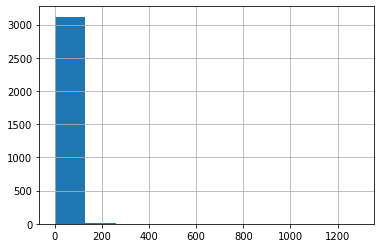

In [17]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count